## Solar Power Prediction Using Linear Regression Model

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
#load the dataset
df = pd.read_csv('dataset\solarpowergeneration.csv')
#Display the first few rows of the dataset
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8016\1075135277.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('dataset\solarpowergeneration.csv')


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [7]:
df.tail()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [8]:
df.head(10)


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [9]:
# to chect the total number of rows and cols
df.shape

(4213, 21)

In [10]:
# display summary
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [11]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [12]:
#check for missing values
df.isnull().sum()


temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [13]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt

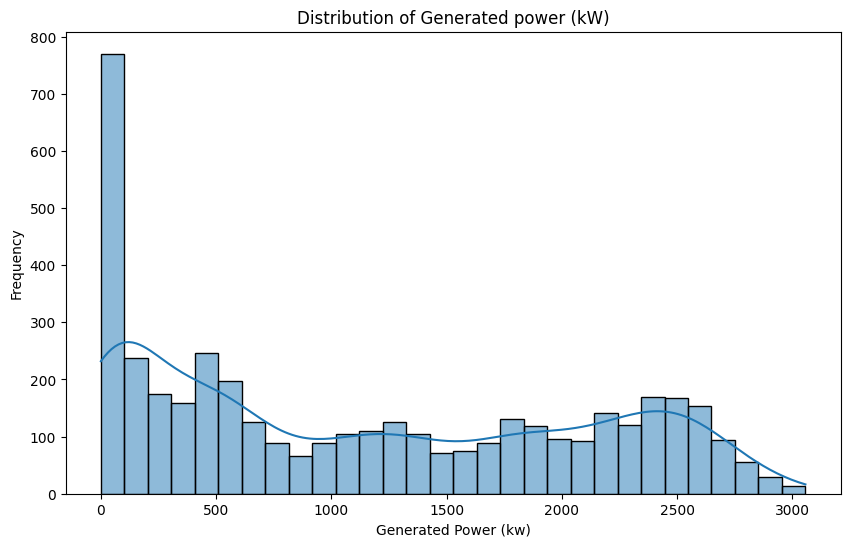

In [16]:
# plot distributon of power
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'],bins=30,kde=True)
plt.title('Distribution of Generated power (kW)')
plt.xlabel('Generated Power (kw)')
plt.ylabel('Frequency')
plt.show()

# EDA


# Histrogram for remaining columns


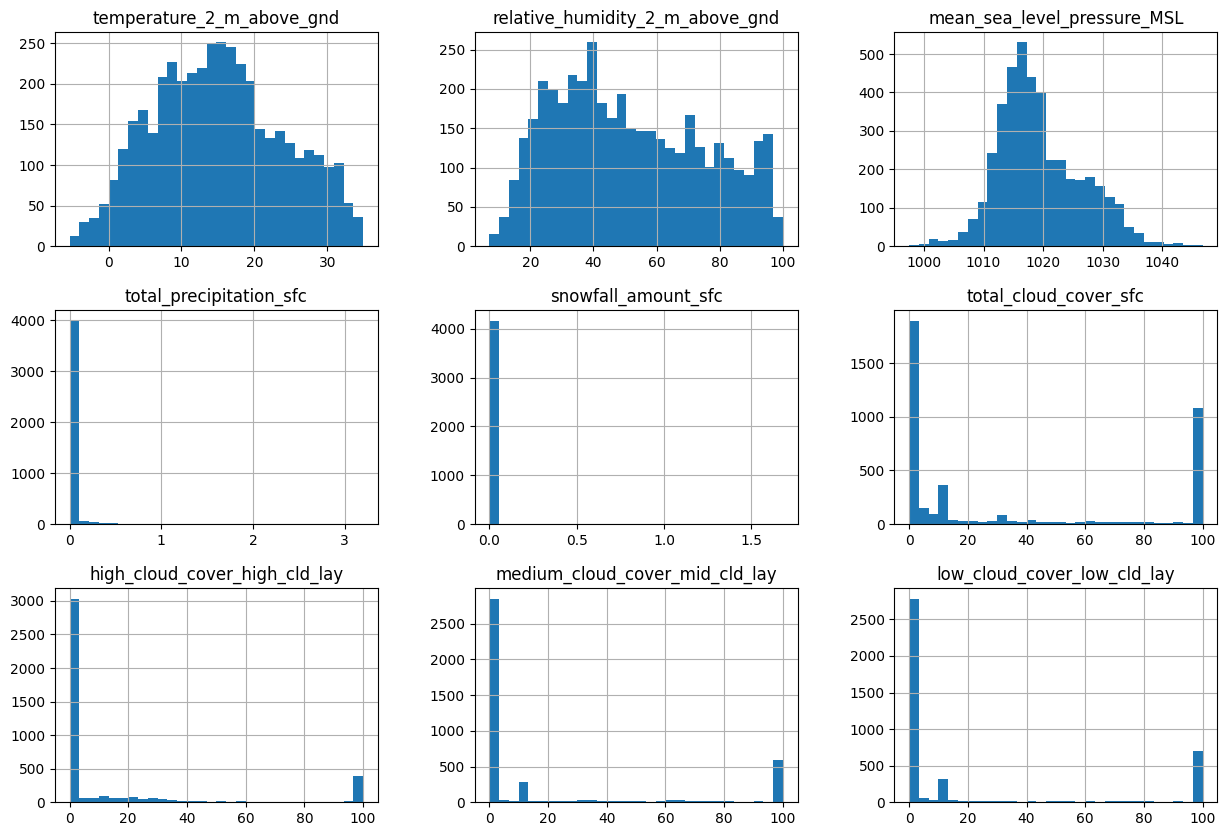

In [17]:
df[df.columns[:9]].hist(bins=30,figsize=(15,10))
plt.show()

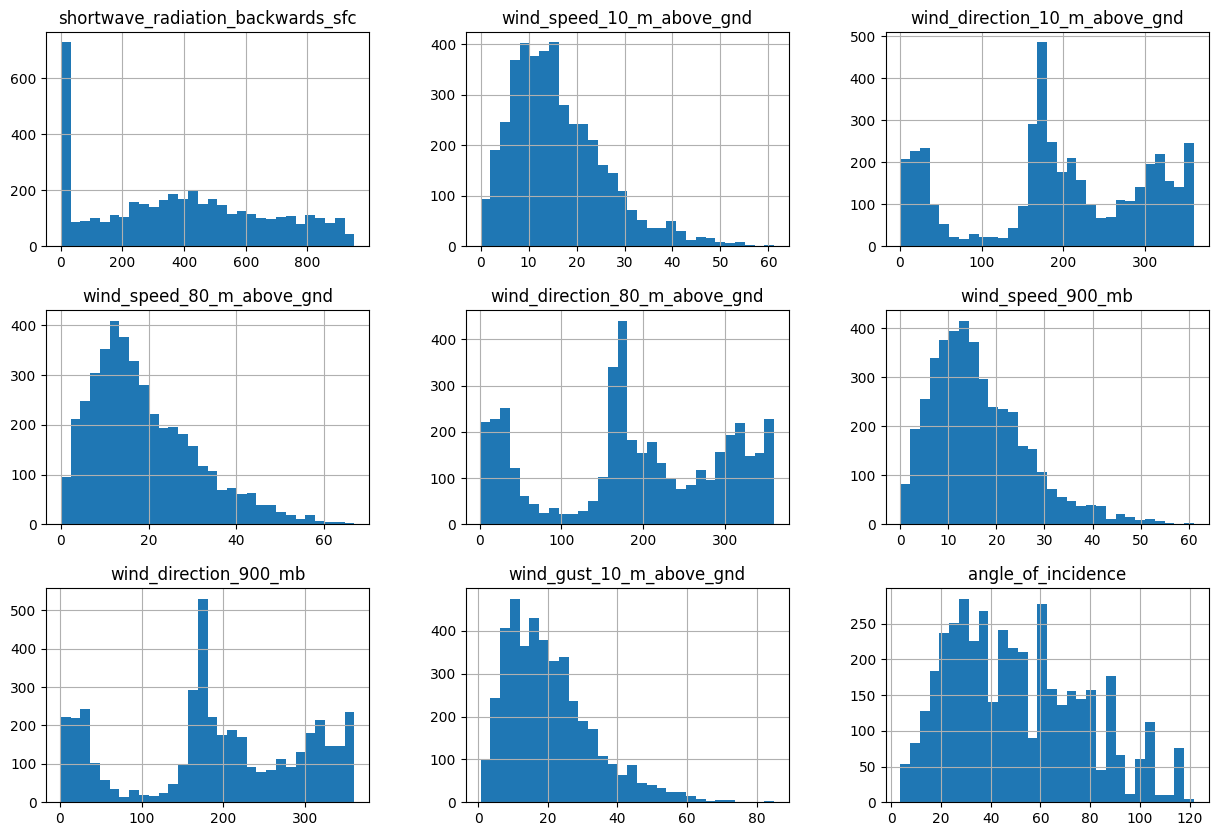

In [18]:
df[df.columns[9:18]].hist(bins=30,figsize=(15,10))
plt.show()

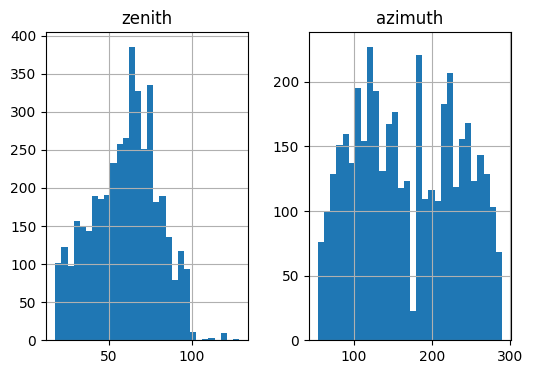

In [19]:
df[df.columns[18:20]].hist(bins=30,figsize=(6,4))
plt.show()

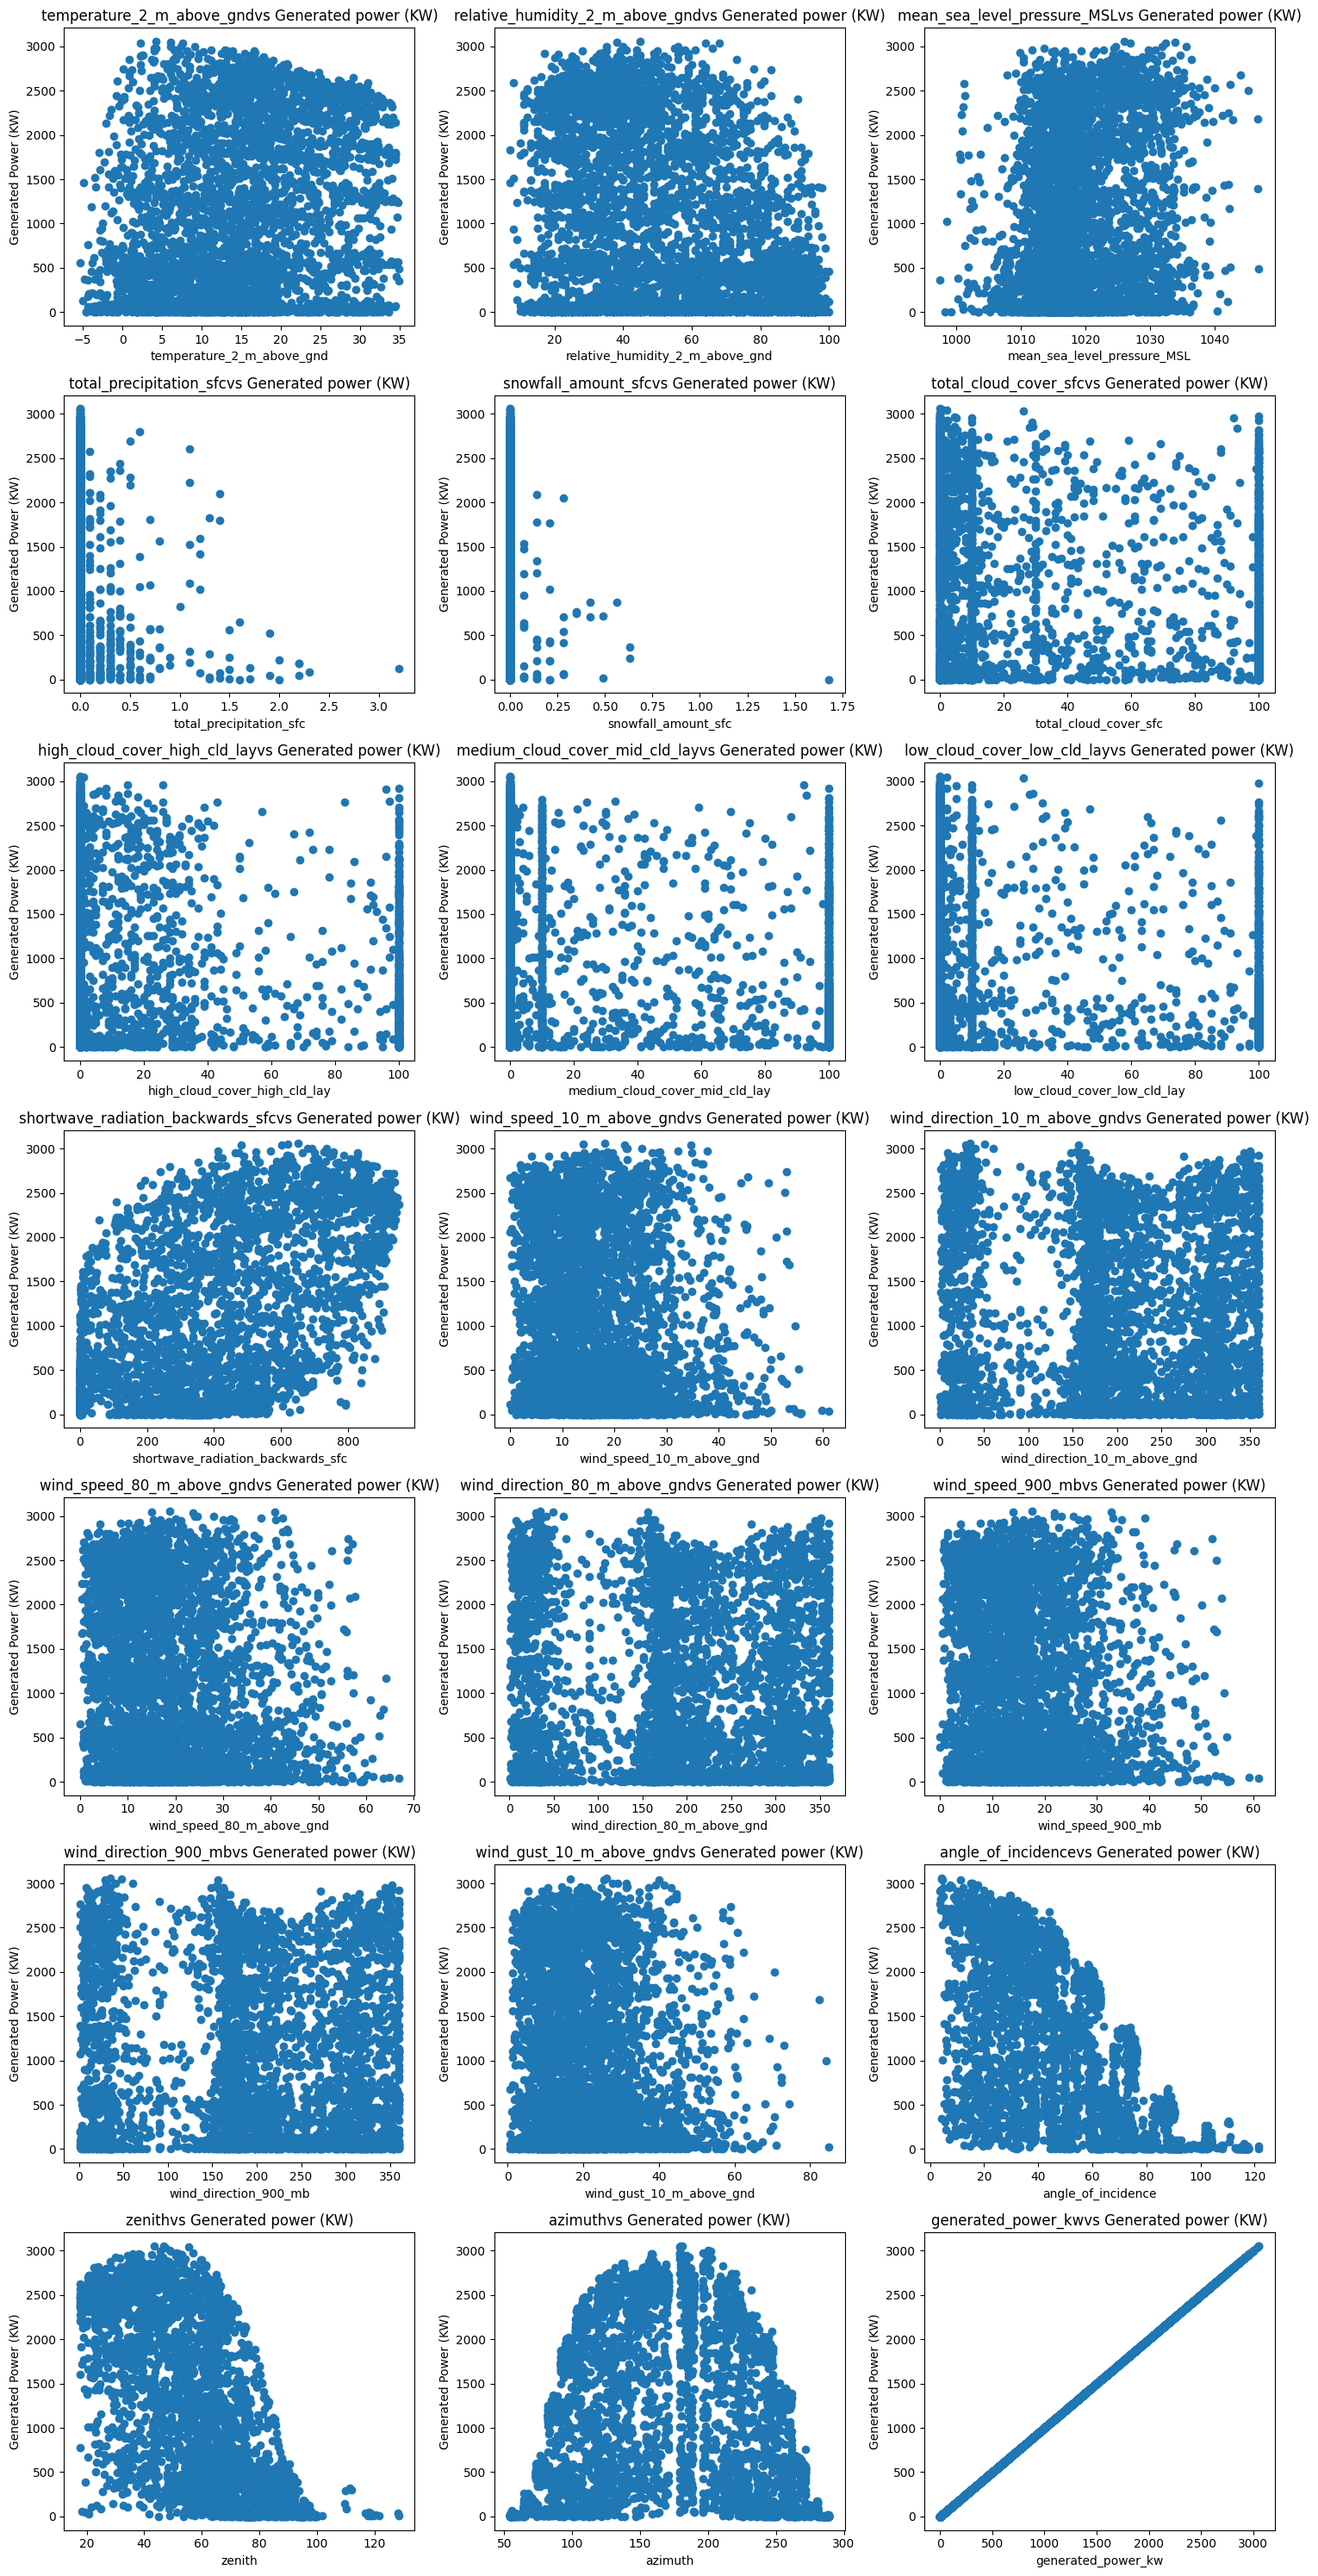

In [20]:
#Bivariate analysis
#Scatter plot with target feature
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    plt.scatter(df[column],df['generated_power_kw'])
    plt.title(f'{column}vs Generated power (KW)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (KW)')
plt.tight_layout()
plt.show()


In [21]:
df.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


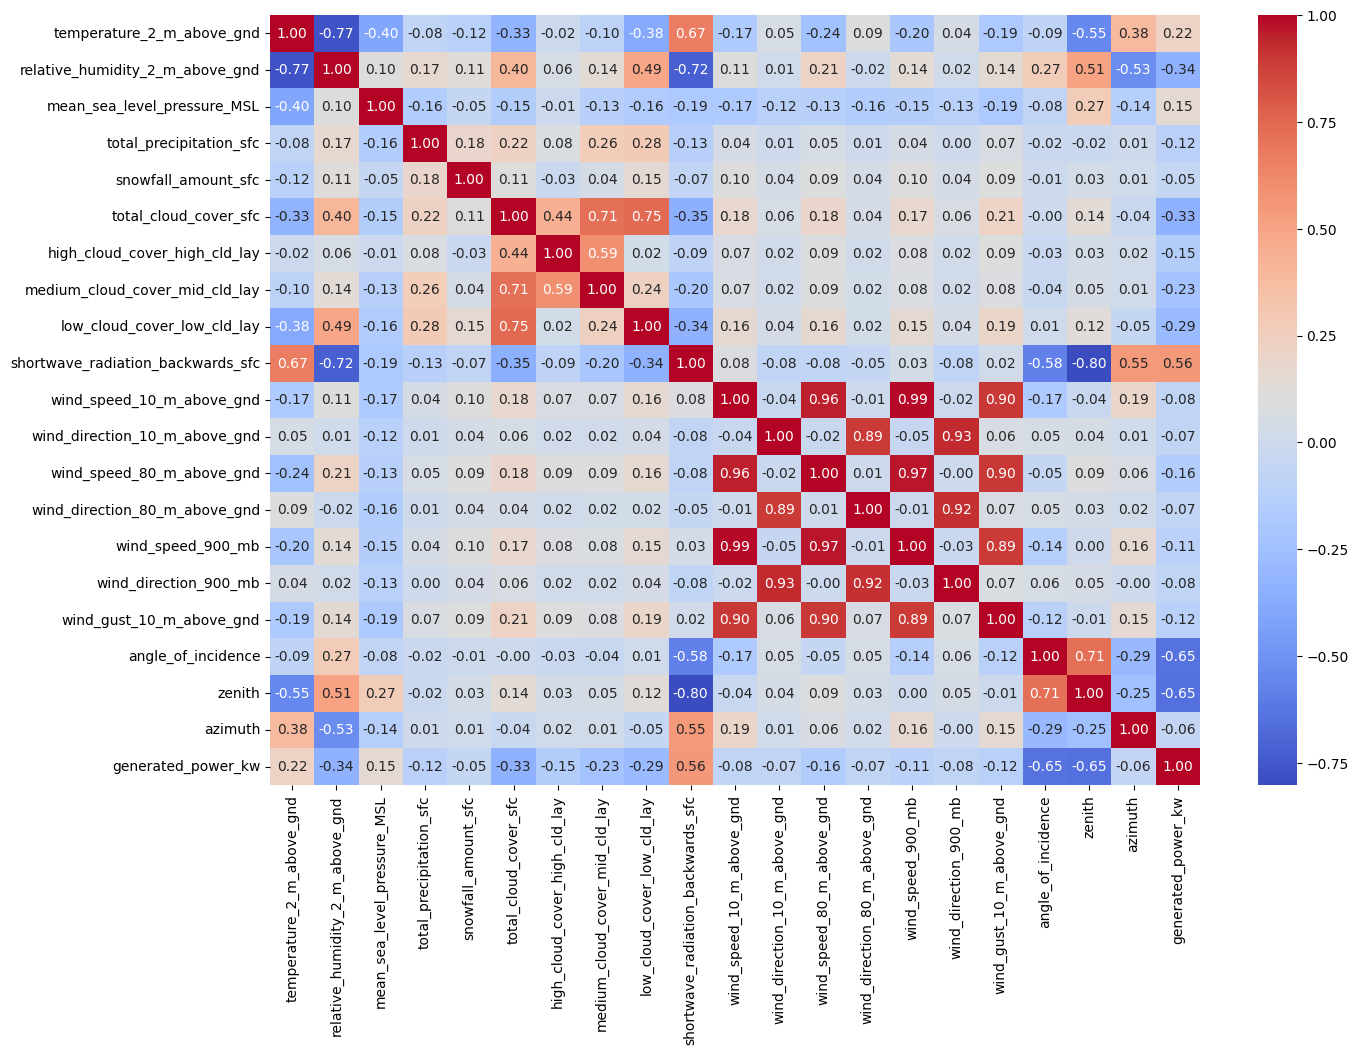

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

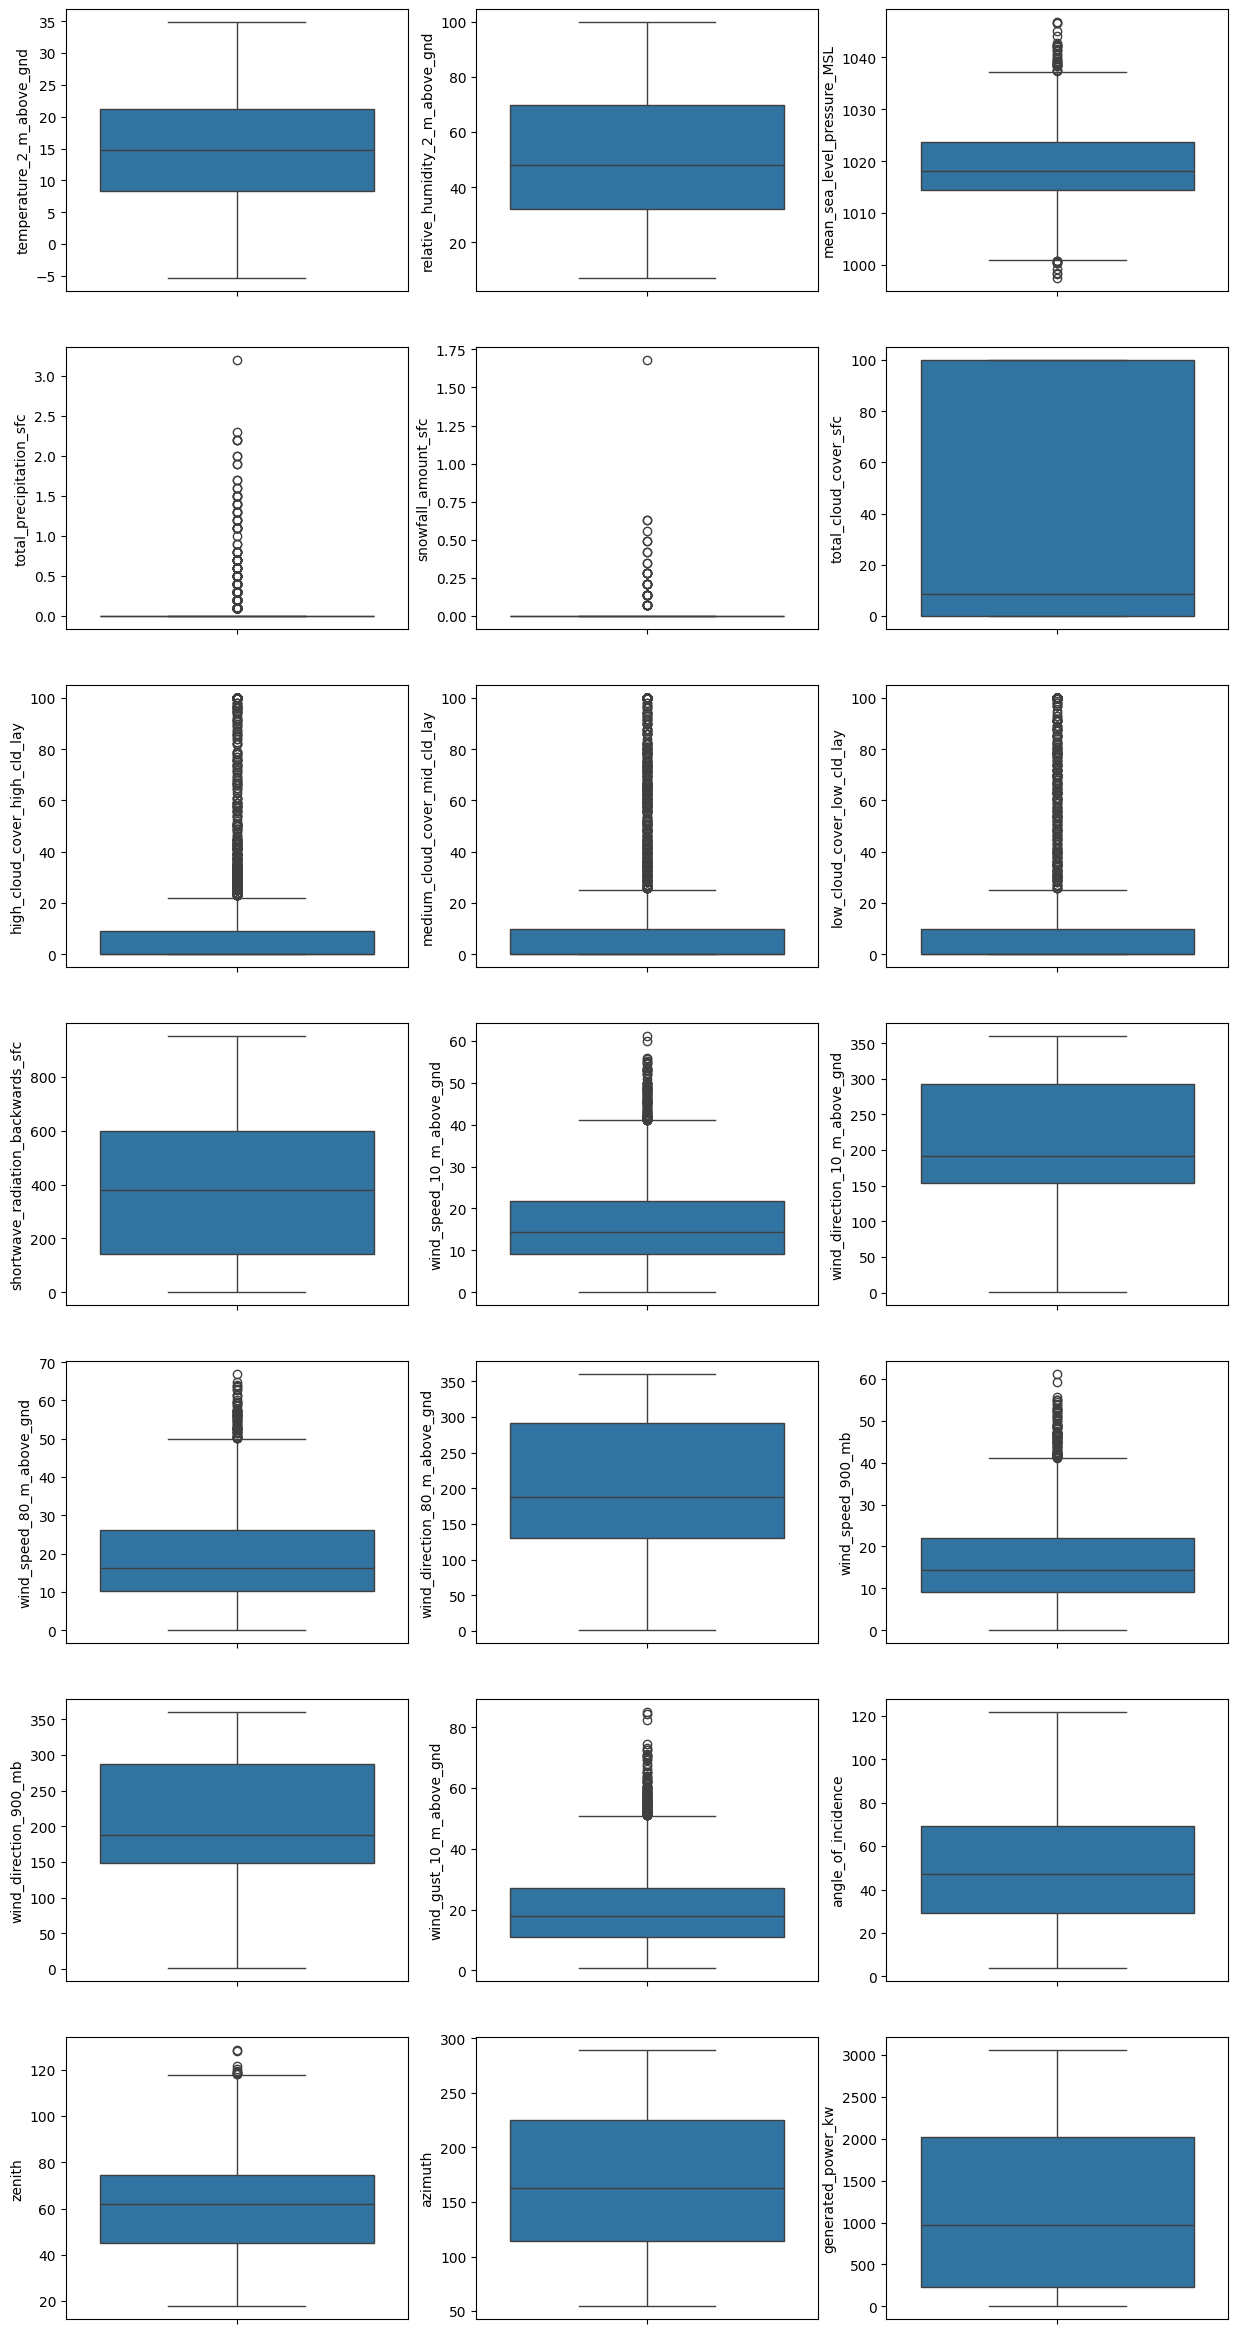

In [23]:
#outlier
plt.figure(figsize=(15,30))
for i,column in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[column])
plt.show() 

## ML for solar power output

## Let's build Machine Learning Model to Predict the Solar Power Generation

In [24]:
pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [28]:
# Splitting the dataset into features and target
X=df.drop('generated_power_kw',axis=1)
y=df['generated_power_kw']

In [31]:
#Let's split the dayaset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [32]:
#Scaling
scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [33]:
# Train the model
model =LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
# Evaluate the model -test
y_pred =model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 391.79269568403123


In [40]:
# Evaluate the model on training set
y_pred_train =model.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error on Test Set: {mae_train}")

Mean Absolute Error on Test Set: 392.42118159774026
